In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# Nuestro dataset
file = "/vagrant/DataCategorico.csv"

# Cargandolo 

headers = ['IdPlaza','Turno',
           'Carril','TipoPago',
           'Operador',
           'PRE','Cajero','POS','ModoCarril','Monto','Violacion','Tag','Reclasifiacion','Discrepancia']

dfConcentrado = pd.read_csv(file,names=headers,sep=';')


del dfConcentrado['Monto']
dfConcentrado.head()

,IdPlaza,Turno,Carril,TipoPago,Operador,PRE,Cajero,POS,ModoCarril,Violacion,Tag,Reclasifiacion,Discrepancia
0,8,1,B01,15,445223,0,12,12,7,N,Y,N,N
1,51,1,A22,15,451692,0,12,12,7,N,Y,N,N
2,8,1,B01,15,445223,0,2,2,7,N,Y,N,N
3,8,1,B01,15,445223,0,1,1,7,N,Y,N,N
4,51,1,A22,15,451692,0,1,1,7,N,Y,N,N


In [3]:
#Utilizamos los datos de una sola plaza
Df = dfConcentrado[dfConcentrado.IdPlaza.isin([7,8])]
Df.head()

,IdPlaza,Turno,Carril,TipoPago,Operador,PRE,Cajero,POS,ModoCarril,Violacion,Tag,Reclasifiacion,Discrepancia
0,8,1,B01,15,445223,0,12,12,7,N,Y,N,N
2,8,1,B01,15,445223,0,2,2,7,N,Y,N,N
3,8,1,B01,15,445223,0,1,1,7,N,Y,N,N
9,8,1,B01,15,445223,0,1,1,7,N,Y,N,N
12,8,1,B05,1,554670,1,1,1,1,N,N,N,N


In [4]:
Df.dtypes

IdPlaza            int64
Turno              int64
Carril            object
TipoPago           int64
Operador           int64
PRE                int64
Cajero             int64
POS                int64
ModoCarril         int64
Violacion         object
Tag               object
Reclasifiacion    object
Discrepancia      object
dtype: object

In [5]:
dataset = Df.values

In [6]:
X = dataset[:,:-1]
y = dataset[:,-1]
X = X.astype(str)

In [7]:

#Dividir Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


# Checamos las dimensiones
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)



Train (107871, 12) (107871,)
Test (53131, 12) (53131,)


In [19]:
X_test[]

array([['7', '1', 'A08', ..., 'N', 'N', 'N'],
       ['7', '1', 'A08', ..., 'N', 'Y', 'N'],
       ['7', '3', 'A07', ..., 'N', 'N', 'N'],
       ...,
       ['8', '3', 'B02', ..., 'N', 'Y', 'N'],
       ['7', '2', 'A11', ..., 'N', 'Y', 'N'],
       ['7', '2', 'A06', ..., 'N', 'N', 'N']], dtype='<U6')

In [8]:
#Input data
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

In [9]:
#Target data
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [10]:
# Preparamos los datos de entrada o características
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)

# Preparamos los datos de salida o target
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [11]:
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [12]:
# Selección de características con chi-squared
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)



Característica 0: 0.000440
Característica 1: 288.608833
Característica 2: 2.401879
Característica 3: 190.728457
Característica 4: 1630.432853
Característica 5: 20237.552888
Característica 6: 16946.410990
Característica 7: 37785.317884
Característica 8: 80.206127
Característica 9: 79.288715
Característica 10: 15.874946
Característica 11: 1609.564333


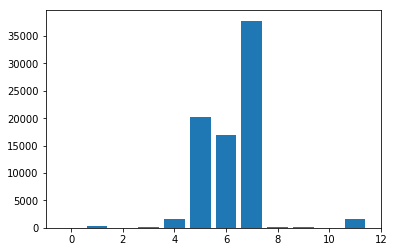

Accuracy/exactitud: 97.47 %


/home/vagrant/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [13]:
for i in range(len(fs.scores_)):
    print('Característica %d: %f' % (i, fs.scores_[i]))

plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

#Buscamos el modelo
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)

#Encontramos el modelo
yhat = model.predict(X_test_fs)

#Evaluamos el desempeño del modelo encontrado
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy/exactitud: %.2f' % (accuracy*100), '%')

In [14]:
def select_features_Mutuas(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [15]:
# Selección de características con mutual information
X_train_fs, X_test_fs, fs = select_features_Mutuas(X_train_enc, y_train_enc, X_test_enc)

Característica 0: 0.006025
Característica 1: 0.017139
Característica 2: 0.014474
Característica 3: 0.027459
Característica 4: 0.019002
Característica 5: 0.044458
Característica 6: 0.037338
Característica 7: 0.032821
Característica 8: 0.033861
Característica 9: 0.000366
Característica 10: 0.003814
Característica 11: 0.008496


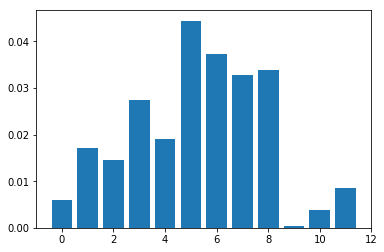

Accuracy/exactitud: 97.47 %


/home/vagrant/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [16]:
for i in range(len(fs.scores_)):
    print('Característica %d: %f' % (i, fs.scores_[i]))

plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

#Buscamos el modelo
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)

#Encontramos el modelo
yhat = model.predict(X_test_fs)

#Evaluamos el desempeño del modelo encontrado
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy/exactitud: %.2f' % (accuracy*100), '%')